In [47]:
import openpyxl
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import pylustrator
# pylustrator.start()
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
from datetime import datetime 
current_date = datetime.now().strftime('%y-%m-%d')

**Import**

In [31]:
def read_numeric_column_values(file_path, sheet_name, column):
    numeric_values = []
    try:
        workbook = openpyxl.load_workbook(file_path, data_only=True)
        sheet = workbook[sheet_name]
        column_values = sheet[column]
        for cell in column_values:
            if cell.value is not None:
                try:
                    numeric_value = float(cell.value)
                    numeric_values.append(numeric_value)
                except ValueError:
                    continue  # Skip non-numeric values and continue to the next iteration
    except FileNotFoundError:
        print("File not found. Please check the file path.")
    except KeyError:
        print("Sheet not found. Please check the sheet name.")
    except Exception as e:
        print("An error occurred:", e)
    finally:
        if 'workbook' in locals():
            workbook.close()
    return numeric_values


In [56]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002"
column = "J"
DMSO = read_numeric_column_values(file_path, sheet_name, column)
print("Column values:", column_values)

Column values: [92.7, 146.775, 100.425, 95.78999999999999, 81.1125, 100.425, 83.42999999999999, 97.85000000000001, 88.8375, 135.95999999999998, 88.8375, 89.61, 77.25, 84.975, 103.0, 83.42999999999999, 95.78999999999999, 103.0, 84.975, 83.42999999999999, 96.5625, 98.88, 98.88, 86.52000000000001]


In [129]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002"
column = "U"
#change to xlabel
pnBb_25 = read_numeric_column_values(file_path, sheet_name, column)
print("Column values:", pnBb_25)

file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002"
column = "AE"
#change to xlabel
pnBb_50 = read_numeric_column_values(file_path, sheet_name, column)
print("Column values:", pnBb_50)

Column values: [133.9, 108.14999999999999, 113.3, 162.225, 88.8375, 100.425, 87.55, 100.425, 118.45, 146.775, 90.49285714285715, 96.5625, 113.3, 80.34, 90.125, 133.9, 108.14999999999999, 128.75, 97.85000000000001, 96.5625, 97.85000000000001, 97.85000000000001, 92.7, 88.8375, 83.42999999999999, 105.05999999999999, 113.3, 92.7, 123.60000000000001, 84.975, 123.60000000000001, 115.875, 100.425, 97.85000000000001, 103.0]
Column values: [149.35, 139.05, 113.3, 162.225, 115.875, 101.97, 113.3, 118.45, 104.2875, 87.55, 113.3, 118.45, 103.0, 113.3, 96.5625, 113.3, 100.425, 87.55, 92.7, 108.14999999999999, 81.1125, 96.5625, 123.6, 92.7, 92.7, 123.6, 92.7, 118.45, 96.5625, 92.7]


**Bar Plot**

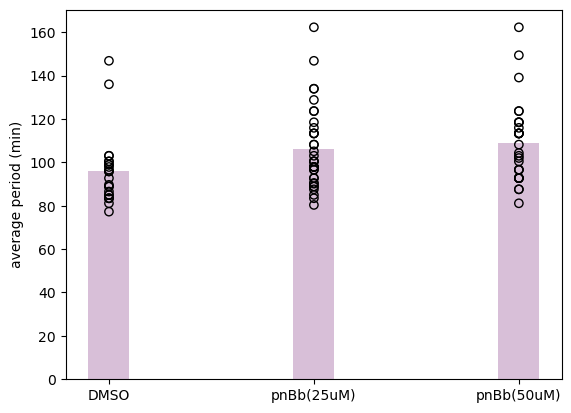

In [131]:
# Plotting the bar graph with slimmer bars and empty circles for dots
bar1 = plt.bar("DMSO", statistics.mean(DMSO), color='thistle', align='center', width = 0.2)  # Bar representing the average of column1 values
bar2 = plt.bar("pnBb(25uM)", statistics.mean(pnBb_25), color='thistle', align='center', width = 0.2)  # Bar representing the average of column2 values
bar3 = plt.bar("pnBb(50uM)", statistics.mean(pnBb_50), color='thistle', align='center', width = 0.2)  # Bar representing the average of column2 values

plt.ylabel('average period (min)')

        
# Overlaying dots for columns using scatter plot with empty circles
plt.scatter([0.0] * len(DMSO), DMSO, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column1 values with empty circles

plt.scatter([1.0] * len(pnBb_25), pnBb_25, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles

plt.scatter([2.0] * len(pnBb_50), pnBb_50, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles

plt.show()

**Violin Plot**

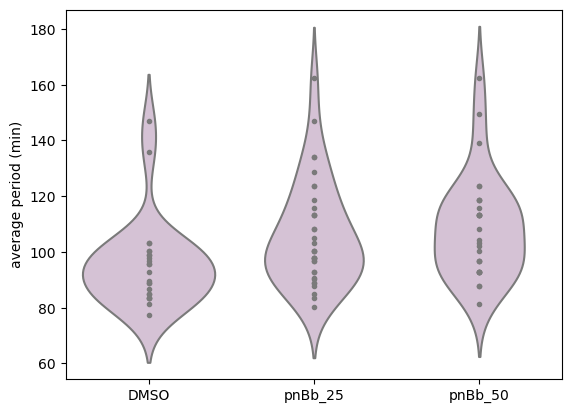

In [133]:
sns.violinplot(data=[DMSO, pnBb_25, pnBb_50], color="thistle", inner="point")
# palette="muted"
# inner="point" / inner="quart" / leaving inner empty gives a bar with whiskers

plt.xticks(ticks=[0, 1, 2], labels=["DMSO", "pnBb_25", "pnBb_50"])

plt.ylabel('average period (min)')

# Save the plot as a PNG file
# plt.savefig("bleb002-average-period.png")

plt.show()

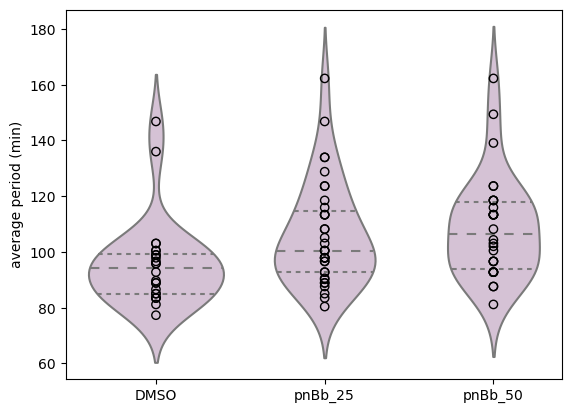

In [137]:
sns.violinplot(data=[DMSO, pnBb_25, pnBb_50], color="thistle", inner="quart")
# palette="muted"
# inner="point" / inner="quart" / leaving inner empty gives a bar with whiskers

plt.xticks(ticks=[0, 1, 2], labels=["DMSO", "pnBb_25", "pnBb_50"])

plt.ylabel('average period (min)')

plt.scatter([0.0] * len(DMSO), DMSO, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column1 values with empty circles
plt.scatter([1.0] * len(pnBb_25), pnBb_25, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles
plt.scatter([2.0] * len(pnBb_50), pnBb_50, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles

# Save the plot as a PNG file
plt.savefig("bleb002-average-period.png")

plt.show()

**XY Plot**

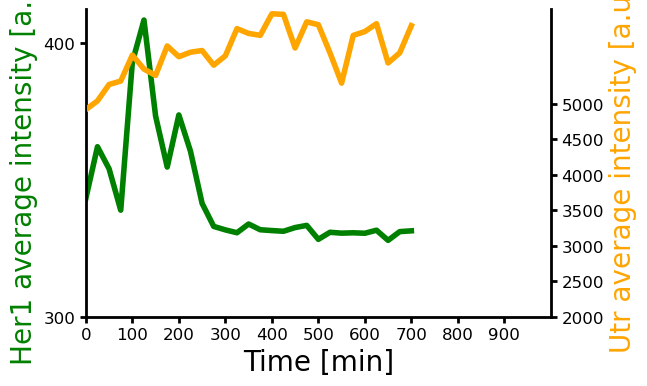

In [248]:
#plotting intensities from a square ROI

file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb001_intensities"
tr = 25 #time resolution, actually 25.6 mins

her1 = read_numeric_column_values(file_path, sheet_name, column = "AQ")
utrophin = read_numeric_column_values(file_path, sheet_name, column = "AR")

fig,ax = plt.subplots(figsize=[6,4])
ax.plot(her1, color='green',linewidth=4)
ax.set_ylabel("Her1 average intensity [a.u.]", fontsize = 20, color = "green")
ax.tick_params(labelsize=12)
ax.set_xticks(np.arange(0,40,4))
ax.set_xticklabels(np.arange(0,40,4)*tr)
ax.set_yticks(np.arange(300,500,100))
ax.set_xlim([0,40])

# To make a secondary Y-axis
ax2 = ax.twinx()
ax2.plot(utrophin, color='orange', linewidth=4)
ax2.set_ylabel('Utr average intensity [a.u.]', color='orange', fontsize = 20)
ax2.tick_params(width=2, length=4, labelsize = 12)
ax2.set_yticks(np.arange(2000,5500,500))

ax.set_xlabel('Time [min]', fontsize = 20)
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)

plt.savefig("bleb001-xy170.png", bbox_inches='tight', facecolor = 'white')

plt.show()




**Plot from a dataframe**

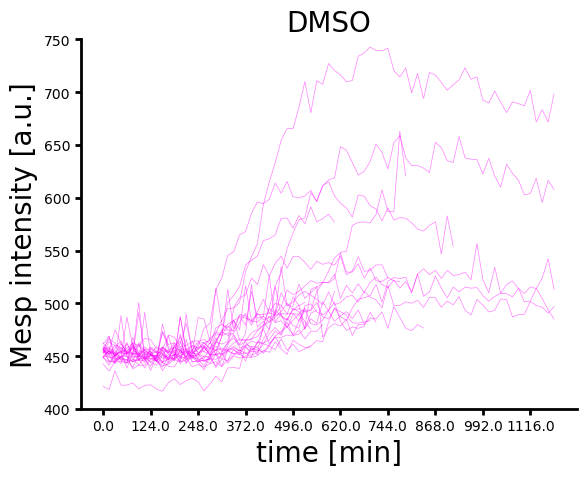

In [306]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002_well1_mesp"
intensities_mesp = pd.read_excel(file_path, sheet_name=sheet_name)

tr = 15.5 #time resolution
fig, ax = plt.subplots()

# Extract every second column
columns_to_plot = intensities_mesp.iloc[:, 1::2]  # Selects every second column starting from index 1

# Plot each column
for column in columns_to_plot.columns:
    plt.plot(intensities_mesp.index, columns_to_plot[column], label=column, color = 'magenta', linewidth=0.5, alpha=0.5)

plt.title('DMSO', fontsize=20)


ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
#ax.set_xticklabels(np.arange(0,80,8))


ax.set_xticks(np.arange(0,80,8))
ax.tick_params(width=2, length=4)
ax.set_xticklabels(np.arange(0,80,8)*tr)
ax.set_ylim([400,750])

plt.xlabel('time [min]', fontsize=20)
plt.ylabel('Mesp intensity [a.u.]', fontsize=20)

plt.savefig("bleb002-mesp-dmso.png", bbox_inches='tight', facecolor = 'white')
plt.show()

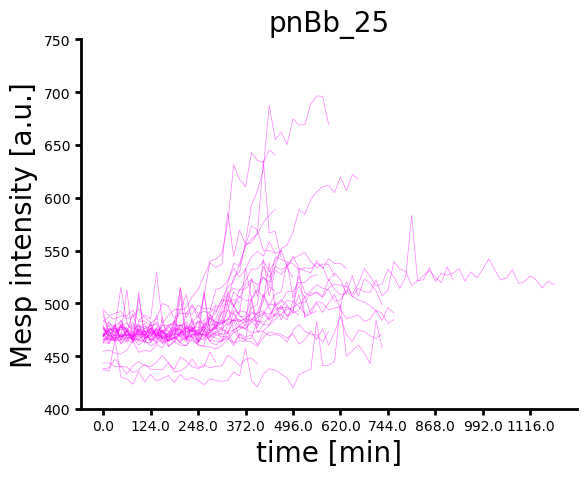

In [307]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002_well2_mesp"
intensities_mesp = pd.read_excel(file_path, sheet_name=sheet_name)

tr = 15.5 #time resolution
fig, ax = plt.subplots()

# Extract every second column
columns_to_plot = intensities_mesp.iloc[:, 1::2]  # Selects every second column starting from index 1

# Plot each column
for column in columns_to_plot.columns:
    plt.plot(intensities_mesp.index, columns_to_plot[column], label=column, color = 'magenta', linewidth=0.5, alpha=0.5)

plt.title('pnBb_25', fontsize=20)


ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
#ax.set_xticklabels(np.arange(0,80,8))


ax.set_xticks(np.arange(0,80,8))
ax.tick_params(width=2, length=4)
ax.set_xticklabels(np.arange(0,80,8)*tr)
ax.set_ylim([400,750])

plt.xlabel('time [min]', fontsize=20)
plt.ylabel('Mesp intensity [a.u.]', fontsize=20)

plt.savefig("bleb002-mesp-pnbb25.png", bbox_inches='tight', facecolor = 'white')
plt.show()

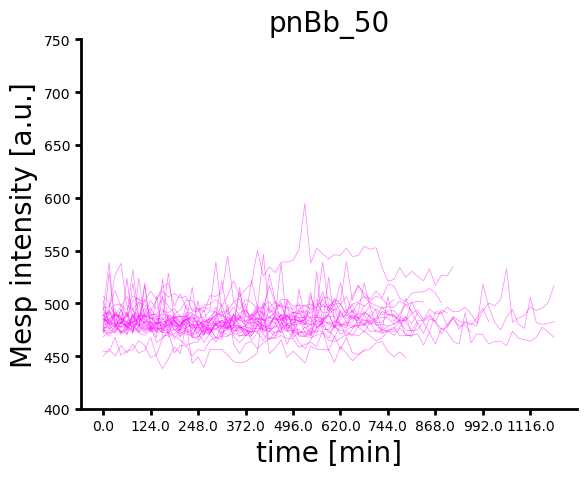

In [432]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002_well3_mesp"
intensities_mesp = pd.read_excel(file_path, sheet_name=sheet_name)

tr = 15.5 #time resolution
fig, ax = plt.subplots()

# Extract every second column
columns_to_plot = intensities_mesp.iloc[:, 1::2]  # Selects every second column starting from index 1

# Plot each column
for column in columns_to_plot.columns:
    plt.plot(intensities_mesp.index, columns_to_plot[column], label=column, color = 'magenta', linewidth=0.5, alpha=0.5)

plt.title('pnBb_50', fontsize=20)


ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
#ax.set_xticklabels(np.arange(0,80,8))


ax.set_xticks(np.arange(0,80,8))
ax.tick_params(width=2, length=4)
ax.set_xticklabels(np.arange(0,80,8)*tr)
ax.set_ylim([400,750])

plt.xlabel('time [min]', fontsize=20)
plt.ylabel('Mesp intensity [a.u.]', fontsize=20)

plt.savefig("bleb002-mesp-pnbb50.png", bbox_inches='tight', facecolor = 'white')
plt.show()

**Normalize length of line plot and smooth**

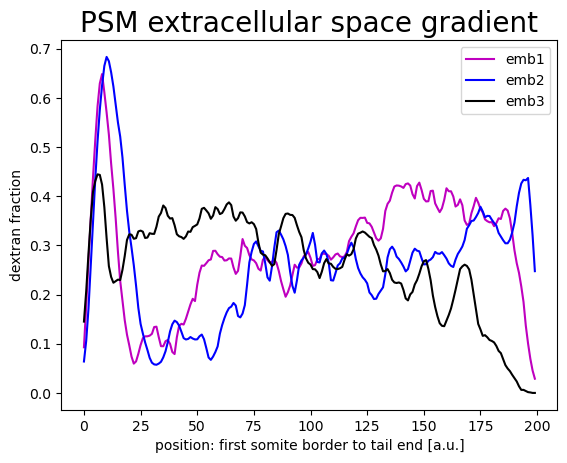

In [437]:
file_path = "/Users/fnarslan/Documents/in vivo quantification/dextran-quantification.xlsx"
#embryo 1
original_array = read_numeric_column_values(file_path, sheet_name = "231025", column = "L")
original_array = np.array(original_array)
#embryo 2
original_array2 = read_numeric_column_values(file_path, sheet_name = "231109", column = "L")
original_array2 = np.array(original_array2)
# embryo 3
original_array3 = read_numeric_column_values(file_path, sheet_name = "240131", column = "L")
original_array3 = np.array(original_array3)


# Define desired size for the array
desired_size = 200

# Generate indices for the original array
indices = np.arange(len(original_array))
indices2 = np.arange(len(original_array2))
indices3 = np.arange(len(original_array3))

# Create interpolation function
interpolated_function = interp1d(indices, original_array, kind='linear')
interpolated_function2 = interp1d(indices2, original_array2, kind='linear')
interpolated_function3 = interp1d(indices3, original_array3, kind='linear')


# Generate new indices
new_indices = np.linspace(0, len(original_array) - 1, desired_size)
new_indices2 = np.linspace(0, len(original_array2) - 1, desired_size)
new_indices3 = np.linspace(0, len(original_array3) - 1, desired_size)

# Interpolate missing values for new indices
resized_array = interpolated_function(new_indices)
resized_array2 = interpolated_function(new_indices2)
resized_array3 = interpolated_function(new_indices3)

# Interpolate values for new indices
interpolated_values = interpolated_function(new_indices)
interpolated_values2 = interpolated_function(new_indices2)
interpolated_values3 = interpolated_function3(new_indices3)

# Apply moving average smoothing
window_size = 8
smoothed_array = np.convolve(interpolated_values, np.ones(window_size) / window_size, mode='same')
smoothed_array2 = np.convolve(interpolated_values2, np.ones(window_size) / window_size, mode='same')
smoothed_array3 = np.convolve(interpolated_values3, np.ones(window_size) / window_size, mode='same')

fig, ax = plt.subplots()
# Plot original and smoothed resized arrays
#plt.plot(indices2, original_array2, 'bo-', label='Original')
plt.plot(smoothed_array, 'm-', label='emb1')
plt.plot(smoothed_array2, 'b-', label='emb2')
plt.plot(smoothed_array3, 'k-', label='emb3')

plt.xlabel('position: first somite border to tail end [a.u.]')
plt.ylabel('dextran fraction')
plt.legend()
plt.title("PSM extracellular space gradient", fontsize = 20)



plt.savefig("PSM-dextran.png", bbox_inches='tight', facecolor = 'white', dpi = 300)
plt.show()


In [32]:
file_path = "/Users/fnarslan/Documents/in_vivo/2D_intensity_profiles/phalloidin/line_profiles.xlsx"
#embryo 1
original_array = read_numeric_column_values(file_path, sheet_name = 'mid-PSM',column = "D")
original_array = np.array(original_array[::-1])
#embryo 2
original_array2 = read_numeric_column_values(file_path,sheet_name = 'mid-PSM', column = "I")
original_array2 = np.array(original_array2[::-1])
# embryo 3
original_array3 = read_numeric_column_values(file_path,sheet_name = 'mid-PSM', column = "N")
original_array3 = np.array(original_array3[::-1])
# emrbyo 4
original_array4 = read_numeric_column_values(file_path, sheet_name = 'mid-PSM',column = "S")
original_array4 = np.array(original_array4[::-1])


# Define desired size for the array
desired_size = 200

# Generate indices for the original array
indices = np.arange(len(original_array))
indices2 = np.arange(len(original_array2))
indices3 = np.arange(len(original_array3))
indices4 = np.arange(len(original_array4))

# Create interpolation function
interpolated_function = interp1d(indices, original_array, kind='linear')
interpolated_function2 = interp1d(indices2, original_array2, kind='linear')
interpolated_function3 = interp1d(indices3, original_array3, kind='linear')
interpolated_function4 = interp1d(indices4, original_array4, kind='linear')


# Generate new indices
new_indices = np.linspace(0, len(original_array) - 1, desired_size)
new_indices2 = np.linspace(0, len(original_array2) - 1, desired_size)
new_indices3 = np.linspace(0, len(original_array3) - 1, desired_size)
new_indices4 = np.linspace(0, len(original_array4) - 1, desired_size)

# Interpolate missing values for new indices
resized_array = interpolated_function(new_indices)
resized_array2 = interpolated_function(new_indices2)
resized_array3 = interpolated_function(new_indices3)
resized_array4 = interpolated_function(new_indices4)

# Interpolate values for new indices
interpolated_values = interpolated_function(new_indices)
interpolated_values2 = interpolated_function2(new_indices2)
interpolated_values3 = interpolated_function3(new_indices3)
interpolated_values4 = interpolated_function4(new_indices4)

# Apply moving average smoothing
window_size = 4
smoothed_array = np.convolve(interpolated_values, np.ones(window_size) / window_size, mode='same')
smoothed_array2 = np.convolve(interpolated_values2, np.ones(window_size) / window_size, mode='same')
smoothed_array3 = np.convolve(interpolated_values3, np.ones(window_size) / window_size, mode='same')
smoothed_array4 = np.convolve(interpolated_values4, np.ones(window_size) / window_size, mode='same')

fig, ax = plt.subplots()
# Plot original and smoothed resized arrays
#plt.plot(indices2, original_array2, 'bo-', label='Original')
plt.plot(smoothed_array, 'm-', label='emb1')
plt.plot(smoothed_array2, 'b-', label='emb2')
plt.plot(smoothed_array3, 'k-', label='emb3')
plt.plot(smoothed_array4, 'g-', label='emb4')

plt.xlim([0,200])
ax.tick_params(width=1, length=4, labelsize = 24)

#plt.xlabel('position: first somite border to tail end [a.u.]')
#plt.ylabel('phalloidin average intensity')
plt.legend()



plt.savefig('/Users/fnarslan/Documents/in_vivo/2D_intensity_profiles/phalloidin/240902-2.svg', bbox_inches='tight', facecolor = 'white', dpi = 300)
plt.show()


File not found. Please check the file path.
File not found. Please check the file path.
File not found. Please check the file path.
File not found. Please check the file path.


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [16]:
def resize_columns(df, desired_size):
    resized_data = {}

    for col in df.columns:
        
        original_array = df[col].dropna().values  # Drop NaN for clean interpolation
        indices = np.arange(len(original_array))
        interpolated_function = interp1d(indices, original_array, kind='linear', fill_value="extrapolate")
        new_indices = np.linspace(0, len(original_array) - 1, desired_size)
        resized_array = interpolated_function(new_indices)
        resized_data[col] = resized_array
    
    resized_df = pd.DataFrame(resized_data)

    return resized_df


# Function to apply moving average smoothing
def apply_moving_average(df, window_size):
    smoothed_df = df.copy()
    for column in df.columns:
        smoothed_df[column] = np.convolve(df[column], np.ones(window_size) / window_size, mode='same')
    return smoothed_df

def normalize_columns(df):
    """
    Normalize each column of the DataFrame by dividing each element by the maximum value of the column.
    """
    df_normalized = df.copy()
    for column in df.columns:
        # Normalize by dividing by the max value in the column
        max_value = df[column].max()
        if max_value != 0:  # Avoid division by zero
            df_normalized[column] = df[column] / max_value
        else:
            df_normalized[column] = df[column]  # If max_value is 0, don't change the column
    return df_normalized




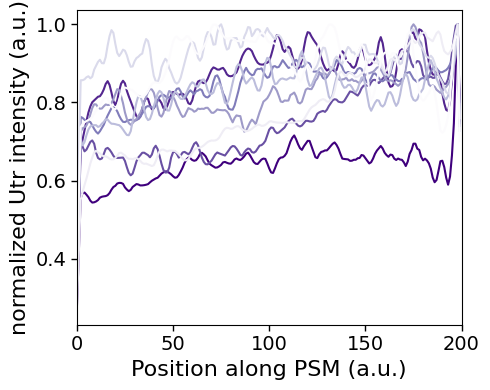

In [ ]:
# utrophin

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/utrophin_myosin_h2b/Book1.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized Utr intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()



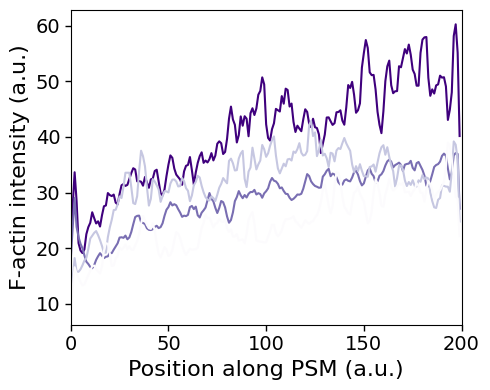

In [ ]:
# phalloidin

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/phalloidin/line_profiles.xlsx"  # Replace with your actual file path
phal = pd.read_excel(file_path)
phal = phal.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
phal_resized = resize_columns(phal,200);
phal_smooth = apply_moving_average(phal_resized, 4);
# phal_norm = normalize_columns(phal_smooth)
phal = phal_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(phal.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(phal.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(phal.columns) - i - 1))  # Reversing the color map index
    plt.plot(phal[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('F-actin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()



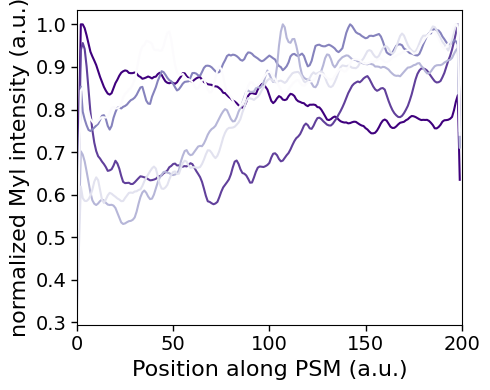

In [57]:
# myosin12.1

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/utrophin_myosin_h2b/Book1.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='myl')
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized Myl intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





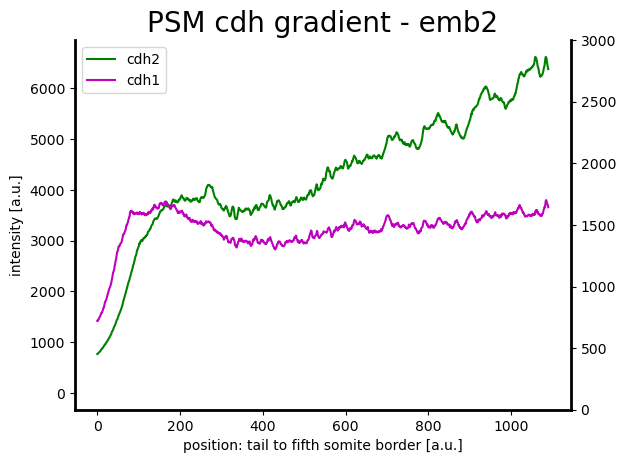

In [454]:
file_path = "/Users/fnarslan/Documents/in vivo quantification/cdh2-cdh1.xlsx"
#embryo 1-cdh2
original_array = read_numeric_column_values(file_path, sheet_name = 'Sheet1', column = "L")
original_array = np.array(original_array)
#embryo 1-cdh1
original_array2 = read_numeric_column_values(file_path, sheet_name = 'Sheet1', column = "O")
original_array2 = np.array(original_array2)


# Apply moving average smoothing
window_size = 1
smoothed_array = np.convolve(original_array, np.ones(window_size) / window_size, mode='same')
smoothed_array2 = np.convolve(original_array2, np.ones(window_size) / window_size, mode='same')

fig, ax = plt.subplots()
# Plot original and smoothed resized arrays
#plt.plot(indices2, original_array2, 'bo-', label='Original')
plt.plot(smoothed_array, 'g-', label='cdh2')
plt.plot(0, 'm-', label='cdh1')


plt.xlabel('position: tail to fifth somite border [a.u.]')
plt.ylabel('intensity [a.u.]')
plt.legend()
plt.title("PSM cdh gradient - emb2", fontsize = 20)

# To make a secondary Y-axis
ax2 = ax.twinx()
ax2.plot(smoothed_array2, 'm-', label='cdh1')
ax2.set_ylim([0,3000])

    
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)


plt.savefig("PSM-cdh-emb2.png", bbox_inches='tight', facecolor = 'white', dpi = 300)
plt.show()

In [ ]:
import imagej
import numpy as np
from skimage.draw import polygon_perimeter
import matplotlib.pyplot as plt

# Start an ImageJ gateway
ij = imagej.init()

# Open your image in ImageJ and manually create ROIs
# Assuming you have already done this and stored the ROI manager in a variable named 'rm'

# Get the ROIs from the ROI manager
231222-cdh2-pos4-psm-mid_rois = ij.roi()
rois = rm.getRoisAsArray()

# Initialize label image
label_image = np.zeros((512, 512), dtype=np.uint8)

# Iterate over each ROI
for i, roi in enumerate(rois):
    # Get coordinates of the ROI polygon
    x = roi.getContainedPointsX()
    y = roi.getContainedPointsY()

    # Fill the ROI in the label image with the ROI number
    rr, cc = polygon_perimeter(y, x)
    label_image[rr, cc] = i + 1

# Display the label image
plt.imshow(label_image, cmap='jet')
plt.colorbar()
plt.title('Label Image (Color-coded by ROI)')
plt.show()
